### tsdGAN: A generative adversarial network approach for removing electrocardiographic interference from electromyographic signals 
Lucas Haberkamp<sup>1,2</sup>, Charles A. Weisenbach<sup>1</sup>, Peter Le<sup>3</sup>  
<sup>1</sup>Naval Medical Research Unit Dayton, Wright-Patterson Air Force Base, OH, USA   
<sup>2</sup>Leidos, Reston, VA, USA   
<sup>3</sup>Air Force Research Laboratory, 711th Human Performance Wing, Wright-Patterson Air Force Base, OH, USA 

#### This notebook generates frequency domain plots of the denoising approaches

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from scipy import signal

In [2]:
# Load data
with open('../../Data/Preprocessed Data/Synthetic/Validation/x_val.pkl', 'rb') as f:
  raw = pickle.load(f)

with open('../../Data/Preprocessed Data/Synthetic//Validation/y_val.pkl', 'rb') as f:
  ground_truth = pickle.load(f)

with open('../../Data/Synthetic Predictions/HPF.pkl', 'rb') as f:
  hpf = pickle.load(f)

with open('../../Data/Synthetic Predictions/tsdGAN.pkl', 'rb') as f:
  tsdGAN = pickle.load(f)

with open('../../Data/Synthetic Predictions/DynamicFiltration.pkl', 'rb') as f:
  dynamic_filtration = pickle.load(f)

with open('../../Data/Synthetic Predictions/TemplateSubtraction.pkl', 'rb') as f:
  template_subtraction = pickle.load(f)

In [3]:
# Set hyperparameters
Fs = 2148
snr_level = 1

def get_psd(data, Fs):
    data /= 1e6
    # Window length of 1 second (1000 samples)
    nperseg = Fs*1
    # 75% overlap
    noverlap = np.ceil(nperseg * 0.75) 
    # Hanning window
    window = 'hann'  
    # Zero-padding to the next power of two
    nfft = 2**np.ceil(np.log2(nperseg))

    freq, pxx = signal.welch(data, fs=Fs, window=window, nperseg=nperseg, 
                                noverlap=noverlap, nfft=nfft)
    return freq, pxx

def get_avg_psd(data, Fs):
    f, pxx = [], []
    for i in range(data.shape[0]):
        curr_f, curr_pxx = get_psd(data[i].squeeze(), Fs=Fs)
        f.append(curr_f)
        pxx.append(curr_pxx)
    return np.mean(f, axis=0), np.mean(pxx, axis=0)

SNR Level: 1


/var/folders/h3/2qlsw83x0w54590ws81c6dy80000gn/T/ipykernel_76318/1915557288.py:56: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([all_f['Raw'][0], all_f['Raw'][-1]])


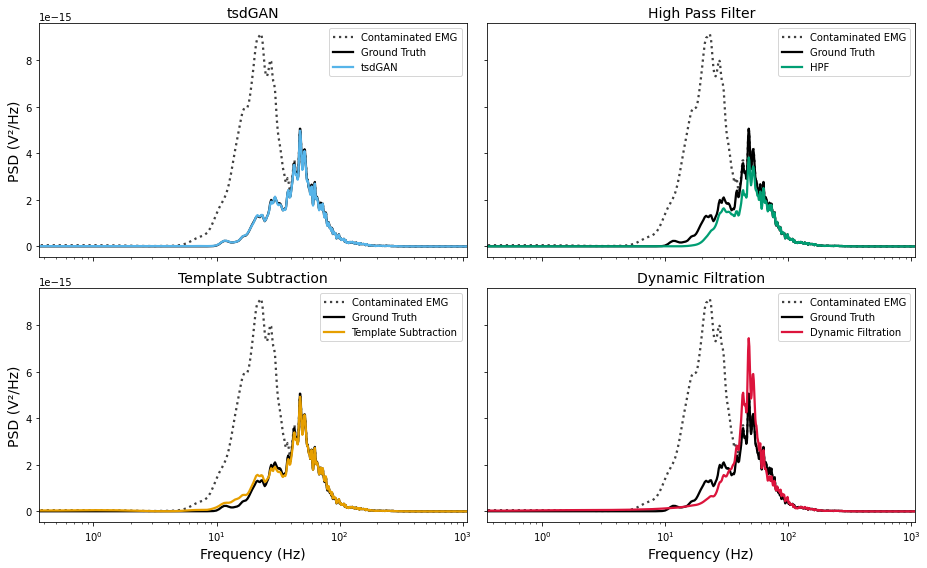

SNR Level: 2


/var/folders/h3/2qlsw83x0w54590ws81c6dy80000gn/T/ipykernel_76318/1915557288.py:56: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([all_f['Raw'][0], all_f['Raw'][-1]])


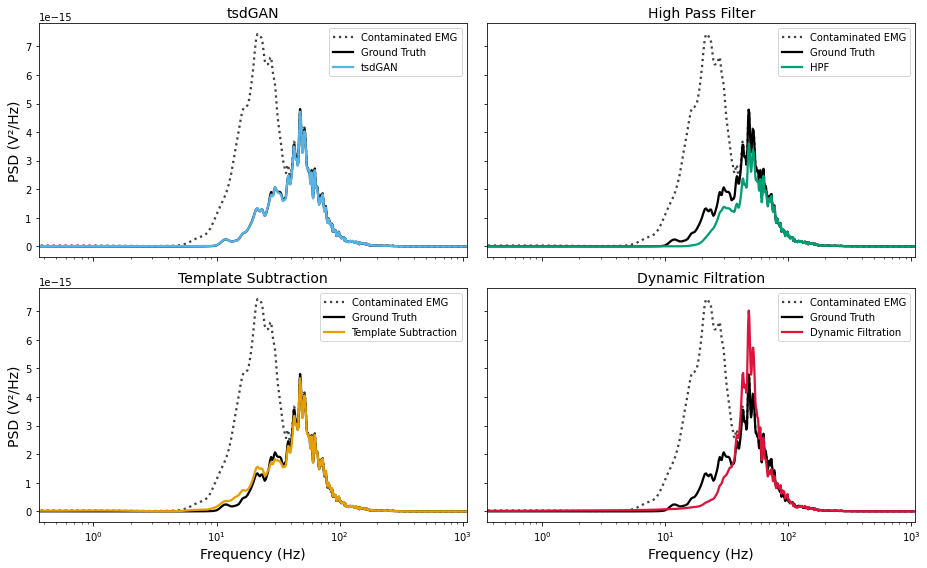

SNR Level: 3


/var/folders/h3/2qlsw83x0w54590ws81c6dy80000gn/T/ipykernel_76318/1915557288.py:56: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([all_f['Raw'][0], all_f['Raw'][-1]])


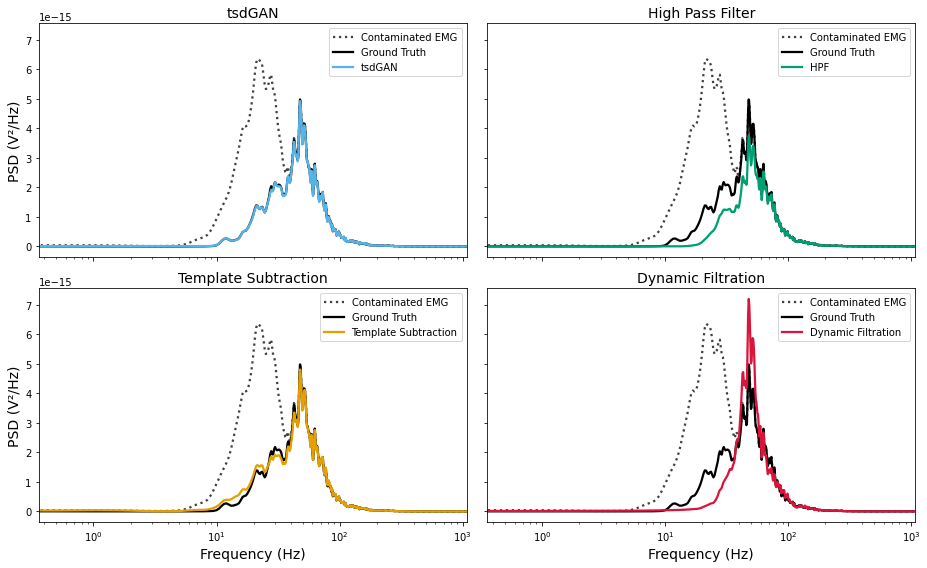

SNR Level: 4


/var/folders/h3/2qlsw83x0w54590ws81c6dy80000gn/T/ipykernel_76318/1915557288.py:56: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([all_f['Raw'][0], all_f['Raw'][-1]])


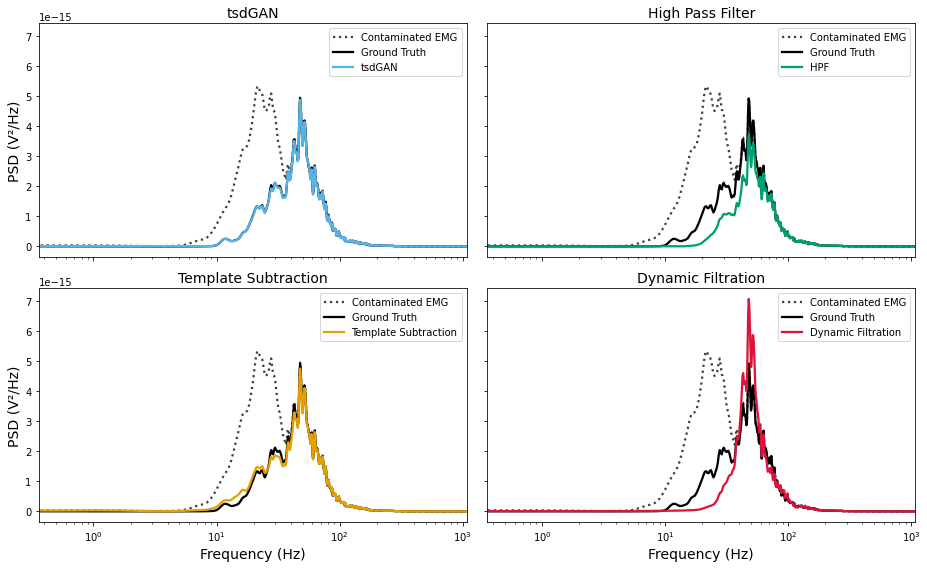

SNR Level: 5


/var/folders/h3/2qlsw83x0w54590ws81c6dy80000gn/T/ipykernel_76318/1915557288.py:56: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([all_f['Raw'][0], all_f['Raw'][-1]])


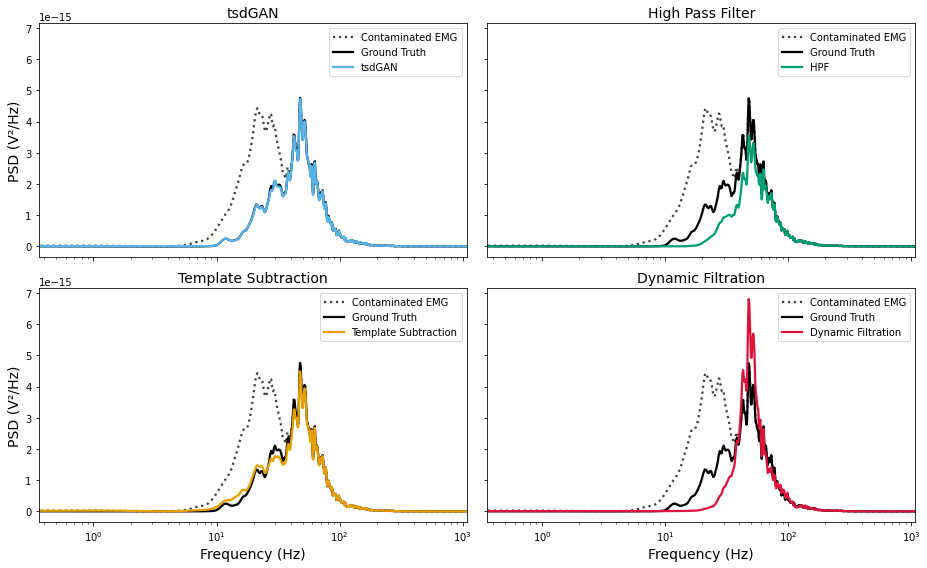

SNR Level: 6


/var/folders/h3/2qlsw83x0w54590ws81c6dy80000gn/T/ipykernel_76318/1915557288.py:56: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([all_f['Raw'][0], all_f['Raw'][-1]])


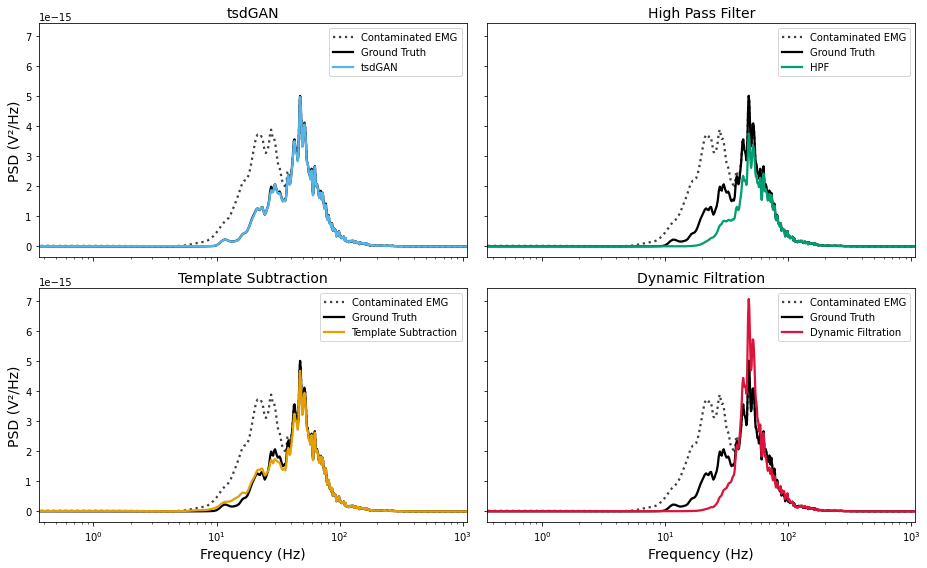

SNR Level: 7


/var/folders/h3/2qlsw83x0w54590ws81c6dy80000gn/T/ipykernel_76318/1915557288.py:56: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([all_f['Raw'][0], all_f['Raw'][-1]])


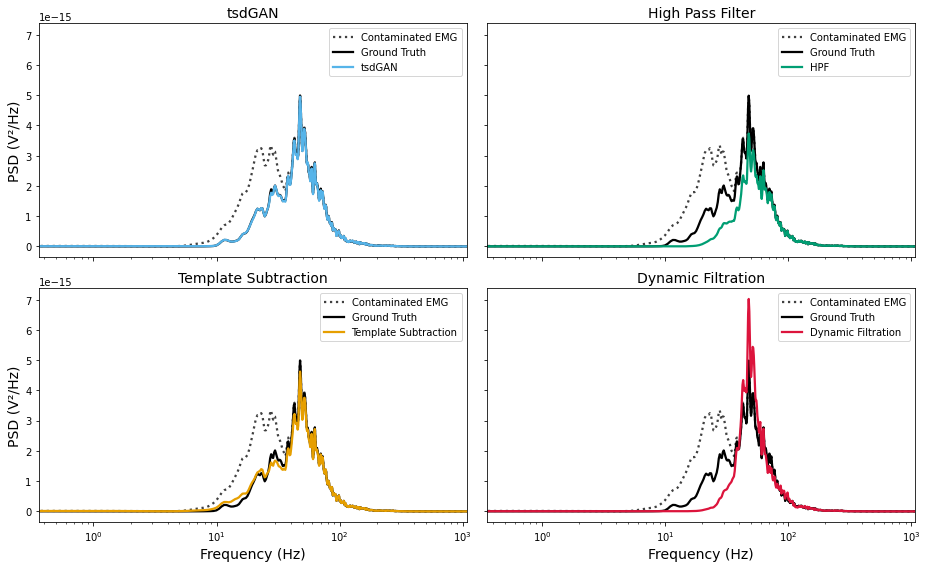

SNR Level: 8


/var/folders/h3/2qlsw83x0w54590ws81c6dy80000gn/T/ipykernel_76318/1915557288.py:56: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([all_f['Raw'][0], all_f['Raw'][-1]])


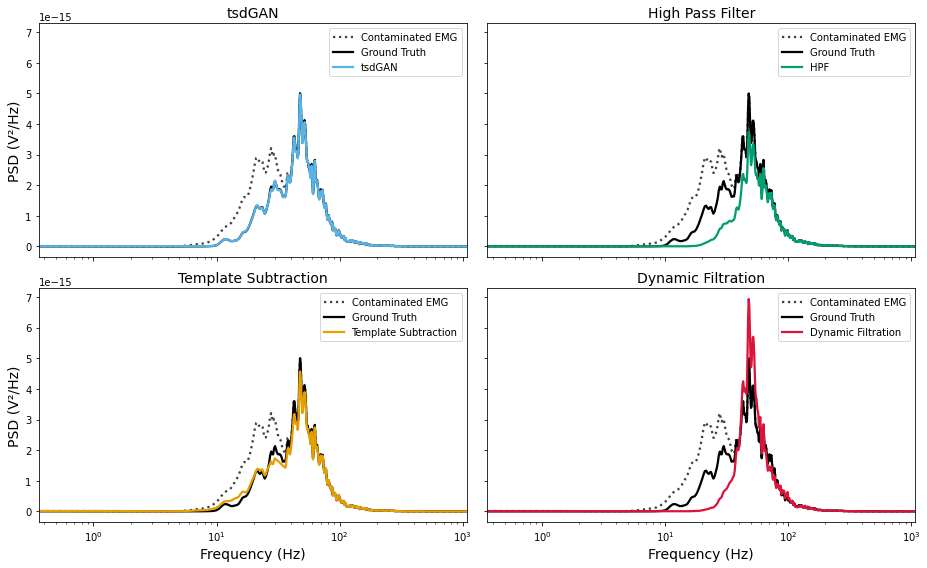

SNR Level: 9


/var/folders/h3/2qlsw83x0w54590ws81c6dy80000gn/T/ipykernel_76318/1915557288.py:56: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([all_f['Raw'][0], all_f['Raw'][-1]])


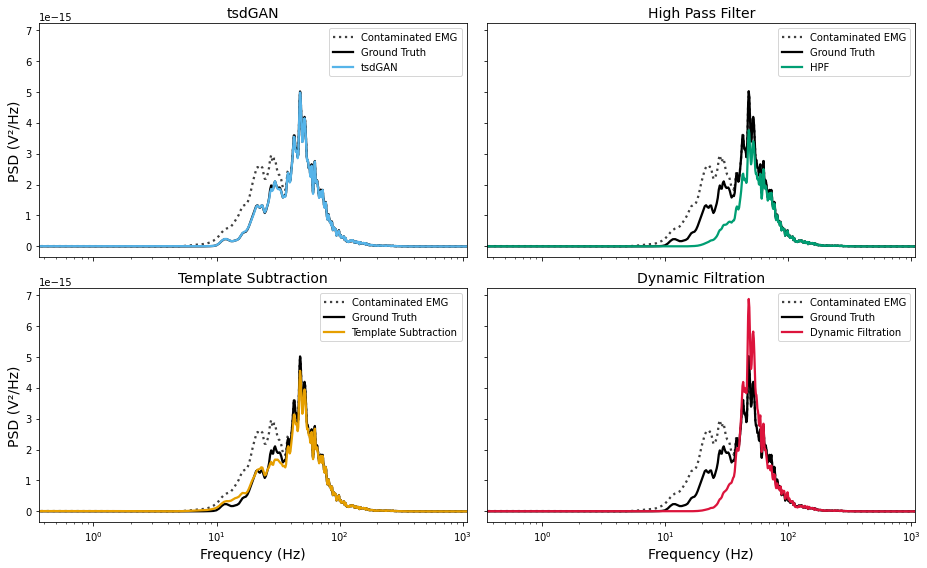

SNR Level: 10


/var/folders/h3/2qlsw83x0w54590ws81c6dy80000gn/T/ipykernel_76318/1915557288.py:56: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([all_f['Raw'][0], all_f['Raw'][-1]])


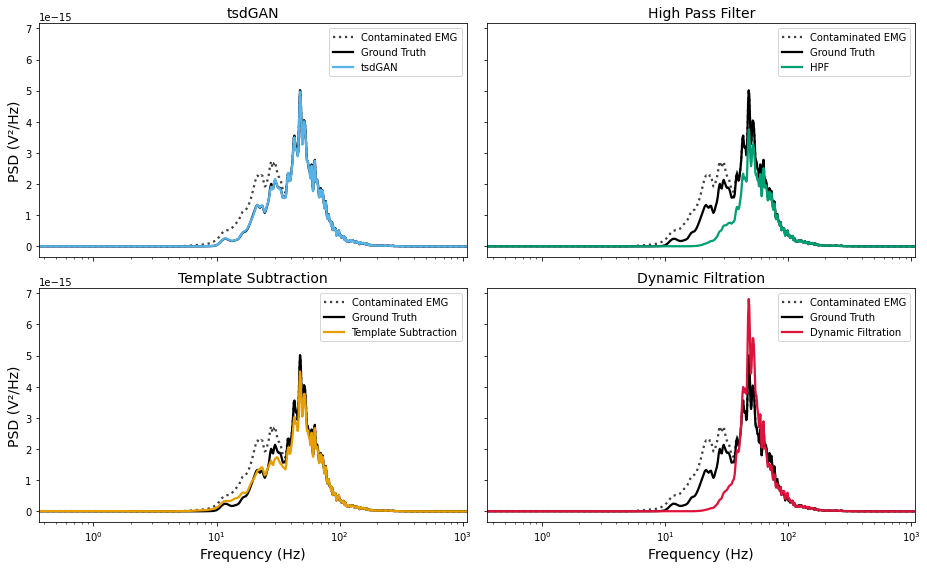

In [4]:
for snr_level in range(1, 11):
    print(f"SNR Level: {snr_level}")

    all_f = {}
    all_pxx = {}

    all_f['Raw'], all_pxx['Raw'] = get_avg_psd(raw[snr_level], Fs=Fs)
    all_f['GroundTruth'], all_pxx['GroundTruth'] = get_avg_psd(ground_truth[snr_level], Fs=Fs)
    all_f['HPF'], all_pxx['HPF'] = get_avg_psd(hpf[snr_level], Fs=Fs)
    all_f['tsdGAN'], all_pxx['tsdGAN'] = get_avg_psd(tsdGAN[snr_level], Fs=Fs)
    all_f['DynamicFiltration'], all_pxx['DynamicFiltration'] = get_avg_psd(dynamic_filtration[snr_level], Fs=Fs)
    all_f['TemplateSubtraction'], all_pxx['TemplateSubtraction'] = get_avg_psd(template_subtraction[snr_level], Fs=Fs)


    fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(13, 8), facecolor='white')

    lw = 2.25

    # Plot the raw data in the top subplot
    ax[0, 0].semilogx(all_f['Raw'], all_pxx['Raw'], color='black', linewidth=lw, label='Contaminated EMG', linestyle='dotted', alpha=0.75)
    ax[0, 0].semilogx(all_f['GroundTruth'], all_pxx['GroundTruth'], color='black', linewidth=lw, label='Ground Truth')
    ax[0, 0].semilogx(all_f['tsdGAN'], all_pxx['tsdGAN'], color='#56B4E9', linewidth=lw, label='tsdGAN')

    ax[1, 0].semilogx(all_f['Raw'], all_pxx['Raw'], color='black', linewidth=lw, label='Contaminated EMG', linestyle='dotted', alpha=0.75)
    ax[1, 0].semilogx(all_f['GroundTruth'], all_pxx['GroundTruth'], color='black', linewidth=lw, label='Ground Truth')
    ax[1, 0].semilogx(all_f['TemplateSubtraction'], all_pxx['TemplateSubtraction'], color='#E69F00', linewidth=lw, label='Template Subtraction')

    ax[0, 1].semilogx(all_f['Raw'], all_pxx['Raw'], color='black', linewidth=lw, label='Contaminated EMG', linestyle='dotted', alpha=0.75)
    ax[0, 1].semilogx(all_f['GroundTruth'], all_pxx['GroundTruth'], color='black', linewidth=lw, label='Ground Truth')
    ax[0, 1].semilogx(all_f['HPF'], all_pxx['HPF'], color='#009E73', linewidth=lw, label='HPF')

    ax[1, 1].semilogx(all_f['Raw'], all_pxx['Raw'], color='black', linewidth=lw, label='Contaminated EMG', linestyle='dotted', alpha=0.75)
    ax[1, 1].semilogx(all_f['GroundTruth'], all_pxx['GroundTruth'], color='black', linewidth=lw, label='Ground Truth')
    ax[1, 1].semilogx(all_f['DynamicFiltration'], all_pxx['DynamicFiltration'], color='#DC143C', linewidth=lw, label='Dynamic Filtration')

    # Add legend and axis labels
    ax[0, 0].legend(loc='upper right', fontsize=10)
    ax[1, 0].legend(loc='upper right', fontsize=10)
    ax[0, 1].legend(loc='upper right', fontsize=10)
    ax[1, 1].legend(loc='upper right', fontsize=10)

    ax[0, 0].set_ylabel('PSD (V\u00B2/Hz)', fontsize=14)
    ax[1, 0].set_ylabel('PSD (V\u00B2/Hz)', fontsize=14)
    # ax[0, 1].set_ylabel('PSD (V\u00B2/Hz)', fontsize=14)
    # ax[1, 1].set_ylabel('PSD (V\u00B2/Hz)', fontsize=14)

    ax[1, 0].set_xlabel('Frequency (Hz)', fontsize=14)
    ax[1, 1].set_xlabel('Frequency (Hz)', fontsize=14)

    # # Set title for each subplot
    ax[0, 0].set_title('tsdGAN', fontsize=14)
    ax[1, 0].set_title('Template Subtraction', fontsize=14)
    ax[0, 1].set_title('High Pass Filter', fontsize=14)
    ax[1, 1].set_title('Dynamic Filtration', fontsize=14)

    plt.xlim([all_f['Raw'][0], all_f['Raw'][-1]])

    # Set tight layout
    plt.tight_layout()
    # # Save the figure
    plt.savefig(f"../../Plots/Synthetic Validation Examples/FrequencyDomain/SNR{snr_level}.png", dpi=500)
    plt.show()
